<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:


In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Lets download the dataset


In [5]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-03-02 17:54:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-03-02 17:54:11 (204 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [6]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [7]:
df.shape


(346, 10)

### Convert to date time object


In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set 


In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:


In [10]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |             main           3 KB  anaconda
    _py-xgboost-mutex-2.0      |            cpu_0           9 KB  anaconda
    _pytorch_select-0.1        |            cpu_0           2 KB  anaconda
    absl-py-0.10.0             |           py37_0         169 KB  anaconda
    aiohttp-3.6.3              |   py37h7b6447c_0         626 KB  anaconda
    argon2-cffi-20.1.0         |   py37h7b6447c_1         

pyodbc-4.0.30        | 72 KB     | ##################################### | 100% 
plotly-4.11.0        | 5.9 MB    | ##################################### | 100% 
psycopg2-2.8.5       | 172 KB    | ##################################### | 100% 
cloudpickle-1.6.0    | 29 KB     | ##################################### | 100% 
toolz-0.11.1         | 47 KB     | ##################################### | 100% 
patsy-0.5.1          | 375 KB    | ##################################### | 100% 
cytoolz-0.11.0       | 367 KB    | ##################################### | 100% 
libsodium-1.0.18     | 387 KB    | ##################################### | 100% 
rsa-4.6              | 26 KB     | ##################################### | 100% 
openssl-1.1.1h       | 3.8 MB    | ##################################### | 100% 
packaging-20.4       | 35 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/

async-timeout-3.0.1  | 12 KB     | ##################################### | 100% 
regex-2020.10.15     | 358 KB    | ##################################### | 100% 
tabulate-0.8.7       | 40 KB     | ##################################### | 100% 
jupyterlab_pygments- | 8 KB      | ##################################### | 100% 
ipython-7.18.1       | 1.1 MB    | ##################################### | 100% 
biopython-1.78       | 2.6 MB    | ##################################### | 100% 
pyasn1-modules-0.2.8 | 67 KB     | ##################################### | 100% 
tensorboard-2.2.1    | 2.5 MB    | ##################################### | 100% 
nbformat-5.0.8       | 101 KB    | ##################################### | 100% 
xlsxwriter-1.3.7     | 104 KB    | ##################################### | 100% 
ca-certificates-2020 | 128 KB    | ##################################### | 100% 
nbconvert-6.0.7      | 530 KB    | ##################################### | 100% 
unixodbc-2.3.9       | 299 K

oauthlib-3.1.0       | 88 KB     | ##################################### | 100% 
python-3.7.9         | 52.8 MB   | ##################################### | 100% 
secretstorage-3.1.2  | 23 KB     | ##################################### | 100% 
h5py-2.10.0          | 1.2 MB    | ##################################### | 100% 
pillow-8.0.0         | 686 KB    | ##################################### | 100% 
terminado-0.9.1      | 26 KB     | ##################################### | 100% 
jinja2-2.11.2        | 97 KB     | ##################################### | 100% 
kiwisolver-1.2.0     | 91 KB     | ##################################### | 100% 
joblib-0.17.0        | 205 KB    | ##################################### | 100% 
libxcb-1.14          | 610 KB    |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/lib/pkgconfig/xcb-dpms.pc.  Please remove this file manual

multidict-4.7.6      | 69 KB     | ##################################### | 100% 
libprotobuf-3.13.0.1 | 2.3 MB    | ##################################### | 100% 
importlib_metadata-2 | 11 KB     | ##################################### | 100% 
pytest-6.1.1         | 418 KB    | ##################################### | 100% 
prompt-toolkit-3.0.8 | 244 KB    | ##################################### | 100% 
parso-0.7.0          | 71 KB     | ##################################### | 100% 
typing_extensions-3. | 29 KB     | ##################################### | 100% 
markdown-3.3.2       | 123 KB    | ##################################### | 100% 
tensorflow-base-2.3. | 302.8 MB  | ##################################### | 100% 
sympy-1.6.2          | 10.5 MB   | ##################################### | 100% 
toml-0.10.1          | 20 KB     | ##################################### | 100% 
pyrsistent-0.17.3    | 89 KB     | ##################################### | 100% 
zeromq-4.3.3         | 678 K

setuptools-50.3.0    | 904 KB    | ##################################### | 100% 
_py-xgboost-mutex-2. | 9 KB      | ##################################### | 100% 
expat-2.2.10         | 192 KB    | ##################################### | 100% 
xlrd-1.2.0           | 186 KB    | ##################################### | 100% 
pexpect-4.8.0        | 79 KB     | ##################################### | 100% 
blas-1.0             | 6 KB      | ##################################### | 100% 
pip-20.2.4           | 2.0 MB    | ##################################### | 100% 
prometheus_client-0. | 48 KB     | ##################################### | 100% 
html5lib-1.1         | 92 KB     | ##################################### | 100% 
tk-8.6.10            | 3.2 MB    | ##################################### | 100% 
numpy-1.19.1         | 20 KB     | ##################################### | 100% 
tornado-6.0.4        | 649 KB    | ##################################### | 100% 
brotlipy-0.7.0       | 348 K

mkl-2019.4           | 204.1 MB  | ##################################### | 100% 
wrapt-1.12.1         | 50 KB     | ##################################### | 100% 
cffi-1.14.3          | 224 KB    | ##################################### | 100% 
argon2-cffi-20.1.0   | 49 KB     | ##################################### | 100% 
seaborn-0.11.0       | 216 KB    | ##################################### | 100% 
mkl_fft-1.2.0        | 164 KB    | ##################################### | 100% 
google-auth-1.22.1   | 62 KB     | ##################################### | 100% 
botocore-1.19.1      | 4.2 MB    | ##################################### | 100% 
wheel-0.35.1         | 36 KB     | ##################################### | 100% 
mkl-service-2.3.0    | 208 KB    | ##################################### | 100% 
networkx-2.5         | 1.2 MB    | ##################################### | 100% 
pyasn1-0.4.8         | 58 KB     | ##################################### | 100% 
pycparser-2.20       | 94 KB

tensorboard-plugin-w | 663 KB    | ##################################### | 100% 
bokeh-2.2.3          | 7.0 MB    | ##################################### | 100% 
scikit-image-0.17.2  | 10.7 MB   | ##################################### | 100% 
widgetsnbextension-3 | 1.8 MB    | ##################################### | 100% 
imageio-2.9.0        | 3.1 MB    | ##################################### | 100% 
future-0.18.2        | 720 KB    | ##################################### | 100% 
intel-openmp-2020.2  | 947 KB    | ##################################### | 100% 
libxml2-2.9.10       | 1.3 MB    |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/bin/xml2-config.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/bin/xml2-config.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/bin/xmlcatalog.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/bin/xmllint.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/lib/cmake/libxml2/libxml2-config.cmake.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_renam

s3transfer-0.3.3     | 90 KB     | ##################################### | 100% 
_libgcc_mutex-0.1    | 3 KB      | ##################################### | 100% 
absl-py-0.10.0       | 169 KB    | ##################################### | 100% 
matplotlib-base-3.3. | 6.7 MB    | ##################################### | 100% 
xz-5.2.5             | 438 KB    | ##################################### | 100% 
c-ares-1.16.1        | 112 KB    | ##################################### | 100% 
zlib-1.2.11          | 120 KB    | ##################################### | 100% 
zstd-1.4.4           | 1006 KB   | ##################################### | 100% 
bleach-3.2.1         | 111 KB    | ##################################### | 100% 
notebook-6.1.4       | 6.3 MB    | ##################################### | 100% 
scikit-learn-0.23.2  | 6.9 MB    | ##################################### | 100% 
python-dateutil-2.8. | 224 KB    | ##################################### | 100% 
dask-core-2.30.0     | 639 K

dill-0.3.2           | 65 KB     | ##################################### | 100% 
nbclient-0.5.1       | 60 KB     | ##################################### | 100% 
ptyprocess-0.6.0     | 23 KB     | ##################################### | 100% 
bzip2-1.0.8          | 105 KB    | ##################################### | 100% 
astor-0.8.1          | 45 KB     | ##################################### | 100% 
ncurses-6.2          | 1.1 MB    |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/bin/tic.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/bin/infocmp.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): 

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/p/prism5.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/p/pe1100.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/p/p8.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/p/pcvt43w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d215-7b.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/darwin-112x37.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d430-unix-w-ccc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d216-unix.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/i/ibm5051.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/i/ibm8604.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/i/interix.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/i/ibmega-c.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_o

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/altos-4.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/avatar0+.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/altos5.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/adm1a.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_r

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/bin/tic.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/bin/infocmp.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/bin/toe.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/bin/tset.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pk

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/p/pcvt50.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/p/pcansi-25.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/p/putty+fnkeys.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/p/pc6300plus.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/darwin-90x30.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d430-unix-25-ccc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d555.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/diablo1720.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.de

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wyse520-36.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wyse60-AT.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wyse120-vb.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wyse520-24.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delet

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/t/tek4109brl.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/t/ts100-ctxt.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/t/ti931.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/t/tvi912cc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unli

lxml-4.6.1           | 1.3 MB    | ##################################### | 100% 
tifffile-2020.10.1   | 260 KB    | ##################################### | 100% 
more-itertools-8.5.0 | 42 KB     | ##################################### | 100% 
pandoc-2.11          | 12.5 MB   | ##################################### | 100% 
libgcc-ng-9.1.0      | 8.1 MB    | ##################################### | 100% 
jsonschema-3.2.0     | 45 KB     | ##################################### | 100% 
ipython_genutils-0.2 | 39 KB     | ##################################### | 100% 
freetds-1.00.97      | 2.4 MB    | ##################################### | 100% 
olefile-0.46         | 48 KB     | ##################################### | 100% 
ld_impl_linux-64-2.3 | 645 KB    | ##################################### | 100% 
requests-2.24.0      | 54 KB     | ##################################### | 100% 
pymssql-2.1.5        | 228 KB    | ##################################### | 100% 
backcall-0.2.0       | 14 KB

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/mistune-0.8.4-py37h14c3975_1001/info/test/tests/fixtures/normal/strong_and_em_together.html.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/mistune-0.8.4-py37h14c3975_1001/info/test/tests/fixtures/extra/gfm_em.text.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/mistune-0.8.4-py37h14c3975_1001/info/test/tests/fixtures/extra/hetero_list.text.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/mistune-0.8.4-py37h14c3975_1001/info/test/tests/fixtures/extra/same_bu

testpath-0.4.4       | 88 KB     | ##################################### | 100% 
lzo-2.10             | 317 KB    | ##################################### | 100% 
krb5-1.17.1          | 1.5 MB    | ##################################### | 100% 
ibm-wsrt-py37main-ke | 2 KB      | ##################################### | 100% 
pyopenssl-19.1.0     | 47 KB     | ##################################### | 100% 
pytorch-1.5.0        | 33.3 MB   | ##################################### | 100% 
libtiff-4.1.0        | 607 KB    |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libtiff-4.1.0-h2733197_1/bin/fax2tiff.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libtiff-4.1.0-h2733197_1/bin/tiff2pdf.  Please remove this file manually (you may need to reboo

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libtiff-4.1.0-h2733197_1/bin/fax2tiff.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libtiff-4.1.0-h2733197_1/bin/tiff2pdf.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libtiff-4.1.0-h2733197_1/bin/tiffdump.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libtiff-4.1.0-h2733197_1/bin/tiffcmp.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove o

markupsafe-1.1.1     | 26 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/markupsafe-1.1.1-py37h14c3975_1/lib/python3.7/site-packages/markupsafe/__pycache__/_compat.cpython-37.pyc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/markupsafe-1.1.1-py37h14c3975_1/lib/python3.7/site-packages/markupsafe/__pycache__/__init__.cpython-37.pyc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/markupsafe-1.1.1-py37h14c3975_1/lib/python3.7/site-packages/markupsafe/__pycache__/_native.cpython-37.pyc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.

pyparsing-2.4.7      | 64 KB     | ##################################### | 100% 
matplotlib-3.3.1     | 24 KB     | ##################################### | 100% 
glib-2.56.2          | 5.0 MB    | ##################################### | 100% 
gstreamer-1.14.0     | 3.8 MB    | ##################################### | 100% 
importlib-metadata-2 | 35 KB     | ##################################### | 100% 
astunparse-1.6.3     | 17 KB     | ##################################### | 100% 
protobuf-3.13.0.1    | 700 KB    | ##################################### | 100% 
pysocks-1.7.1        | 27 KB     | ##################################### | 100% 
gst-plugins-base-1.1 | 6.3 MB    | ##################################### | 100% 
mkl_random-1.1.0     | 376 KB    | ##################################### | 100% 
astropy-4.0.2        | 7.6 MB    | ##################################### | 100% 
libpq-12.2           | 2.8 MB    | ##################################### | 100% 
numpy-base-1.19.1    | 5.2 M

jupyter_client-6.1.7 | 76 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/site-packages/jupyter_client-6.1.7.dist-info/direct_url.json.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/site-packages/jupyter_client-6.1.7.dist-info/WHEEL.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/site-packages/jupyter_client-6.1.7.dist-info/INSTALLER.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/con

pluggy-0.13.1        | 32 KB     | ##################################### | 100% 
certifi-2020.6.20    | 159 KB    | ##################################### | 100% 
pyjwt-1.7.1          | 32 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyjwt-1.7.1-py37_0/bin/pyjwt.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyjwt-1.7.1-py37_0/lib/python3.7/site-packages/jwt/contrib/algorithms/__pycache__/__init__.cpython-37.pyc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyjwt-1.7.1-py37_0/lib/python3.7/site-packages/jwt/contrib/algorithms/__pycache__/py_ecdsa.cpython-37.pyc.  Please remove this file

libpng-1.6.37        | 364 KB    |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/bin/png-fix-itxt.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/bin/pngfix.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/bin/libpng-config.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/bin/libpng16-config.  Please remove this file manually (you may need to reboot to free file

statsmodels-0.12.0   | 10.9 MB   | ##################################### | 100% 
wcwidth-0.2.5        | 37 KB     | ##################################### | 100% 
google-auth-oauthlib | 21 KB     | ##################################### | 100% 
cachetools-4.1.1     | 12 KB     | ##################################### | 100% 
libstdcxx-ng-9.1.0   | 4.0 MB    | ##################################### | 100% 
tensorflow-estimator | 294 KB    | ##################################### | 100% 
icu-58.2             | 22.7 MB   | ###########################7          |  75% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/bin/icuinfo.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/bin/makeconv.  Please remove this file manually (you may need to reboot to free f

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/include/unicode/ucnv.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/include/unicode/platform.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/include/unicode/ubidi.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/include/unicode/ucal.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_tras

yarl-1.6.2           | 139 KB    | ##################################### | 100% 
json5-0.9.5          | 22 KB     | ##################################### | 100% 
sip-4.19.24          | 297 KB    | ##################################### | 100% 
scipy-1.5.2          | 18.5 MB   | ##################################### | 100% 
jeepney-0.4.3        | 22 KB     | ##################################### | 100% 
pcre-8.44            | 269 KB    | ##################################### | 100% 
idna-2.10            | 56 KB     | ##################################### | 100% 
pytables-3.6.1       | 1.5 MB    | ##################################### | 100% 
_pytorch_select-0.1  | 2 KB      | ##################################### | 100% 
blosc-1.19.0         | 81 KB     | ##################################### | 100% 

InvalidArchiveError('Error with archive /opt/conda/pkgs/packaging-20.4-py_0.tar.bz2.  You probably need to delete and re-download or re-create this file.  Message from libarchive was:\n\nCo

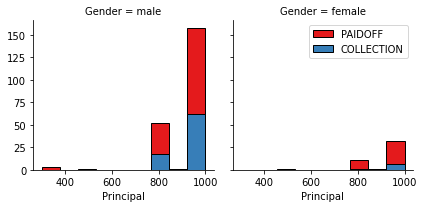

In [11]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

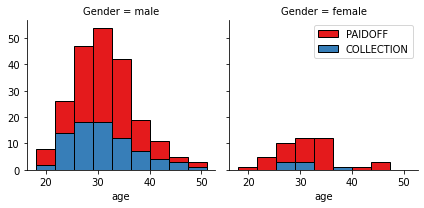

In [12]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at the day of the week people get the loan


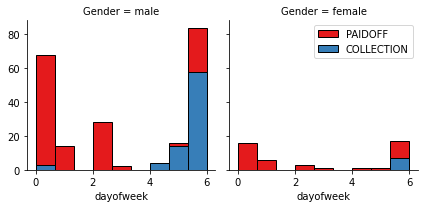

In [13]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 


In [14]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Lets look at gender:


In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [16]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [17]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding


In [18]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [19]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection


Lets defind feature sets, X:


In [20]:

X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [21]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split )


In [28]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression

** Notice:** 

-   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
-   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
-   You should include the code of the algorithm in the following cells.



# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [32]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    ycap=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, ycap)

    
    std_acc[n-1]=np.std(ycap==y_test)/np.sqrt(ycap.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.67142857, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.77142857, 0.65714286,
       0.72857143, 0.72857143, 0.68571429, 0.7       ])

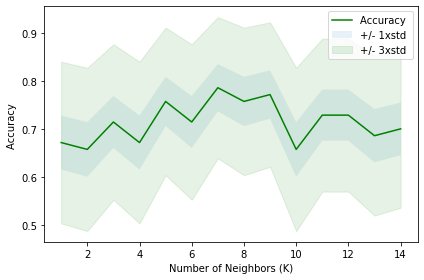

In [33]:
# Plot model accuracy for different number of neighbors

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [34]:

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7857142857142857 with k= 7


In [35]:
from sklearn.metrics import classification_report
print (classification_report(y_test, ycap))

              precision    recall  f1-score   support

  COLLECTION       0.31      0.33      0.32        15
     PAIDOFF       0.81      0.80      0.81        55

    accuracy                           0.70        70
   macro avg       0.56      0.57      0.56        70
weighted avg       0.71      0.70      0.70        70



In [36]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, ycap,pos_label='PAIDOFF')

0.676923076923077

# Decision Tree


In [37]:
X1_trainset, X1_testset, y1_trainset, y1_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Modeling

loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
loanTree.fit(X1_trainset,y1_trainset)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [40]:
# Prediction

predTree = loanTree.predict(X1_testset)

print (predTree [0:5])
print (y1_testset [0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF']


In [137]:
loanTree.fit(X1_trainset,y1_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [41]:
# Evaluation

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y1_testset, predTree))

DecisionTrees's Accuracy:  0.6538461538461539


In [42]:
from sklearn.metrics import classification_report
print (classification_report(y1_testset, predTree))

              precision    recall  f1-score   support

  COLLECTION       0.37      0.48      0.42        27
     PAIDOFF       0.80      0.71      0.75        77

    accuracy                           0.65       104
   macro avg       0.58      0.60      0.59       104
weighted avg       0.69      0.65      0.67       104



In [43]:
from sklearn.metrics import jaccard_score
jaccard_score(y1_testset, predTree,pos_label='PAIDOFF')

0.6043956043956044

# Support Vector Machine


In [44]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [45]:
X2_train, X2_test, y2_train, y2_test = train_test_split( X, y, test_size=0.2, random_state=5)
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [46]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X2_train, y2_train)

SVC()

In [47]:
clf1 = svm.SVC(kernel='linear')
clf1.fit(X2_train, y2_train)

SVC(kernel='linear')

In [48]:
yhat = clf.predict(X2_test)
yhat [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [49]:
yhat1 = clf1.predict(X2_test)
yhat1 [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [50]:
from sklearn.metrics import f1_score
f1_score(y2_test, yhat, average='weighted')

0.5764705882352941

In [51]:
from sklearn.metrics import f1_score
f1_score(y2_test, yhat1, average='weighted')

0.5694915254237288

In [52]:
from sklearn.metrics import jaccard_score
jaccard_score(y2_test, yhat,pos_label='PAIDOFF')

0.7

In [53]:
from sklearn.metrics import jaccard_score
jaccard_score(y2_test, yhat1,pos_label='PAIDOFF')

0.6857142857142857

In [54]:
from sklearn.metrics import classification_report
print (classification_report(y2_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        21
     PAIDOFF       0.70      1.00      0.82        49

    accuracy                           0.70        70
   macro avg       0.35      0.50      0.41        70
weighted avg       0.49      0.70      0.58        70



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression


In [55]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X3_train.shape,  y3_train.shape)
print ('Test set:', X3_test.shape,  y3_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X3_train,y3_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [57]:
yhat3 = LR.predict(X3_test)
yhat3

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF'], dtype=object)

In [58]:
yhat3_prob = LR.predict_proba(X3_test)
yhat3_prob

array([[0.5034238 , 0.4965762 ],
       [0.45206111, 0.54793889],
       [0.30814132, 0.69185868],
       [0.34259428, 0.65740572],
       [0.32025894, 0.67974106],
       [0.31680537, 0.68319463],
       [0.48830185, 0.51169815],
       [0.47823073, 0.52176927],
       [0.34259428, 0.65740572],
       [0.4934056 , 0.5065944 ],
       [0.33806706, 0.66193294],
       [0.49662231, 0.50337769],
       [0.24891907, 0.75108093],
       [0.3419095 , 0.6580905 ],
       [0.43751789, 0.56248211],
       [0.25760497, 0.74239503],
       [0.52357188, 0.47642812],
       [0.30450278, 0.69549722],
       [0.50166363, 0.49833637],
       [0.3195971 , 0.6804029 ],
       [0.44276988, 0.55723012],
       [0.49410185, 0.50589815],
       [0.51350333, 0.48649667],
       [0.47203498, 0.52796502],
       [0.40944694, 0.59055306],
       [0.50846442, 0.49153558],
       [0.51098415, 0.48901585],
       [0.37457647, 0.62542353],
       [0.50418423, 0.49581577],
       [0.25299635, 0.74700365],
       [0.

In [59]:
from sklearn.metrics import jaccard_score
jaccard_score(y3_test, yhat3, pos_label='PAIDOFF')

0.6764705882352942

In [60]:
from sklearn.metrics import classification_report
print (classification_report(y3_test, yhat3))

              precision    recall  f1-score   support

  COLLECTION       0.18      0.13      0.15        15
     PAIDOFF       0.78      0.84      0.81        55

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70



In [158]:
#Log loss

from sklearn.metrics import log_loss
log_loss(y3_test, yhat3_prob)

0.5772287609479654

# Model Evaluation using Test set


In [61]:
# We will use SVM for test set as it has the highest accuracy and jaccard score.

from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [62]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-03-02 18:30:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-03-02 18:30:02 (87.9 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [63]:


test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [162]:
test_df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [64]:
test_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

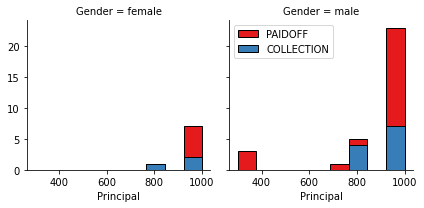

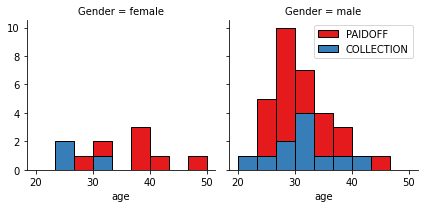

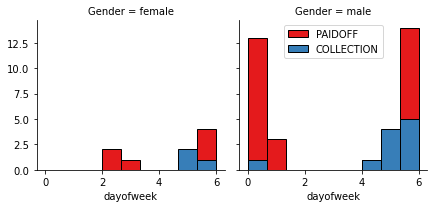

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [65]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()
test_df['loan_status'].value_counts()
import seaborn as sns

bins = np.linspace(test_df.Principal.min(), test_df.Principal.max(), 10)
g5 = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g5.map(plt.hist, 'Principal', bins=bins, ec="k")

g5.axes[-1].legend()
plt.show()
bins = np.linspace(test_df.age.min(), test_df.age.max(), 10)
g5 = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g5.map(plt.hist, 'age', bins=bins, ec="k")

g5.axes[-1].legend()
plt.show()
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
bins = np.linspace(test_df.dayofweek.min(), test_df.dayofweek.max(), 10)
g5 = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g5.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g5.axes[-1].legend()
plt.show()
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()
test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)
test_df[['Principal','terms','age','Gender','education']].head()
Feature5 = test_df[['Principal','terms','age','Gender','weekend']]
Feature5 = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature5.drop(['Master or Above'], axis = 1,inplace=True)
Feature5.head()
X5 = Feature5
X5[0:5]
y_test_df = test_df['loan_status'].values
y_test_df[0:5]
X5= preprocessing.StandardScaler().fit(X).transform(X)
X5[0:5]

In [165]:
X5 = X5[['Principal', 'terms', 'age', 'weekend', 'Gender']]

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [66]:
y_test_df = test_df[['loan_status']]

In [67]:
ypred1 = clf.predict(X5)

In [68]:
type(y_test_df)

pandas.core.frame.DataFrame

In [69]:
y_test_df=y_test_df.to_numpy()

In [70]:
# ********************* FOR KNN MODEL, VALUE OF K=7 IS FOUND UNDER KNN MODEL SECTION *********************

# ********************* ALl EVALUATION METRICS ARE INCLUDED UNDER RESPECTIVE MODELS.*********************

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.70    | 0.68     | NA      |
| Decision Tree      | 0.65    | 0.60     | NA      |
| SVM                | 0.70    |0.70      | NA      |
| LogisticRegression | 0.69    |0.68      |0.58     |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
